Теперь решаем задачу регрессии - предскажем цены на недвижимость.   
Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)  

Построить случайный лес, вывести важность признаков  

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную  

В качестве решения: Jupyter notebook с кодом, комментариями и графиками  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

from pylab import rcParams
rcParams['figure.figsize'] = (12,9)

In [3]:
# !pip install jupyterthemes

# Использовать датасет  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv) 

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [8]:
# в данных есть пропуски, много категориальных признаков. Можно проверить корреляции, есть просто для FE.

# ОЧЕНЬ ПЛОХОЙ FE

In [55]:
X = df.select_dtypes(exclude='object').fillna(-999).drop('SalePrice', axis=1)
y = df.SalePrice

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scalerx = StandardScaler().fit(X)
X_scaled = scalerx.transform(X)

y_scaled = np.log(y)

# Построить случайный лес, вывести важность признаков 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.75)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
regr_rf = RandomForestRegressor(n_estimators=1000, max_depth=10, max_features='auto',
                                random_state=0, n_jobs=-1)

In [75]:
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, n_jobs=-1,
                      random_state=0)

In [76]:
predictions = regr_rf.predict(X_test)

''

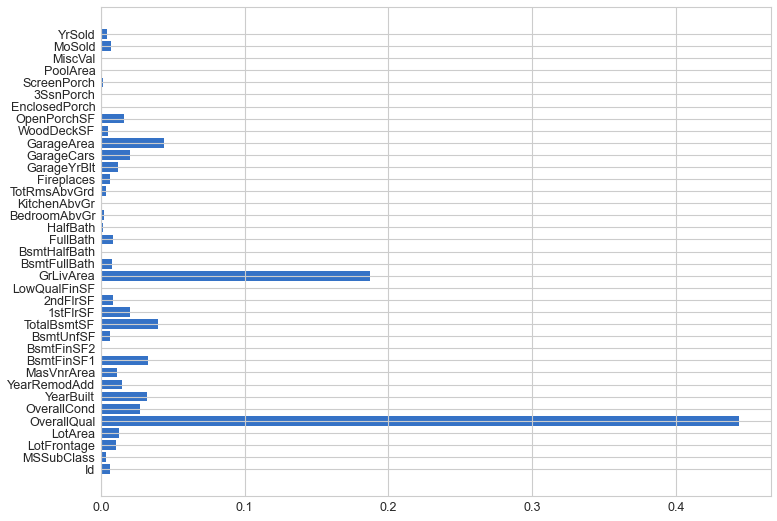

In [77]:
plt.barh(np.arange(len(regr_rf.feature_importances_)),regr_rf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)
''

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
print('Original mean \t', round(np.log(df.SalePrice.mean()),2))
print("R2: \t", round(r2_score(y_test, predictions),2))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, predictions)),2))
print("MAE: \t", round(mean_absolute_error(y_test, predictions),2))

Original mean 	 12.11
R2: 	 0.84
RMSE: 	 0.16
MAE: 	 0.11


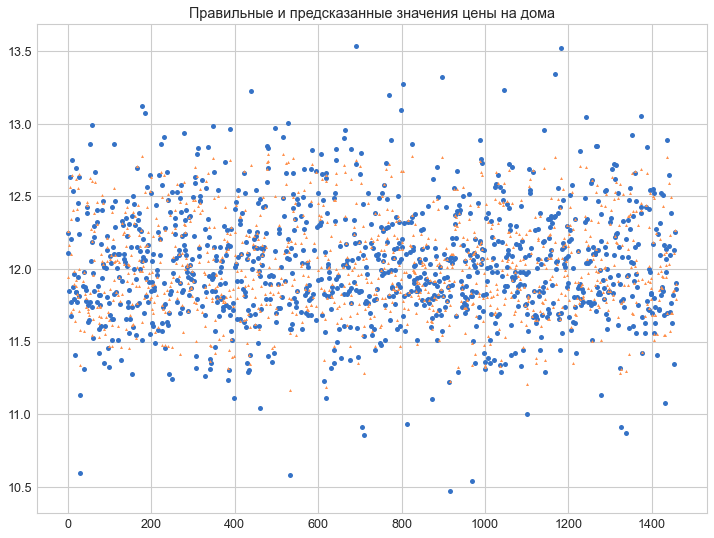

In [82]:
plt.plot(y_test.index, y_test, 'o', markersize = 5)
plt.plot(y_test.index, predictions, 'y^', markersize = 3)
plt.title('Правильные и предсказанные значения цены на дома')
plt.show()

In [86]:
rescale_predict = np.exp(predictions)
rescale_predict[:5]

array([151762.63286895, 233603.45663811, 236058.26772869, 285666.02484803,
       174173.32679944])

# Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную 

In [93]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# возможно также применение RF

In [96]:
classifier = StackingRegressor(
    [
        ('lr', LinearRegression()),
        ('svm', SVR()),
        ('dt',DecisionTreeRegressor()),
        ('knn',KNeighborsRegressor())
    ],
RandomForestRegressor())

In [97]:
classifier.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()), ('svm', SVR()),
                              ('dt', DecisionTreeRegressor()),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor())

In [99]:
classifier.named_estimators_['knn']

KNeighborsRegressor()

In [106]:
y_pred_lr = classifier.named_estimators_['lr'].predict(X_test)
y_pred_svm = classifier.named_estimators_['svm'].predict(X_test)
y_pred_dt = classifier.named_estimators_['dt'].predict(X_test)
y_pred_knn = classifier.named_estimators_['knn'].predict(X_test)

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
print("R2 lr: \t", round(r2_score(y_test, y_pred_lr),2))
print("R2 svm: \t", round(r2_score(y_test, y_pred_svm),2))
print("R2 dt: \t", round(r2_score(y_test, y_pred_dt),2))
print("R2 knn: \t", round(r2_score(y_test, y_pred_knn),2))
print("R2 classifier: \t", round(r2_score(y_test, y_pred),2))

R2 lr: 	 0.8
R2 svm: 	 0.78
R2 dt: 	 0.67
R2 knn: 	 0.77
R2 classifier: 	 0.83


In [109]:
print("RMSE lr: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_lr)),2))
print("RMSE svm: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_svm)),2))
print("RMSE dt: \t", round(np.sqrt(mean_squared_error(y_test, y_pred_dt)),2))
print("RMSE classifier: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

RMSE lr: 	 0.18
RMSE svm: 	 0.19
RMSE dt: 	 0.23
RMSE classifier: 	 0.17


In [110]:
print("MAE lr: \t", round(mean_absolute_error(y_test, y_pred_lr),2))
print("MAE svm: \t", round(mean_absolute_error(y_test, y_pred_svm),2))
print("MAE dt: \t", round(mean_absolute_error(y_test, y_pred_dt),2))
print("MAE classifier: \t", round(mean_absolute_error(y_test, y_pred),2))

MAE lr: 	 0.11
MAE svm: 	 0.12
MAE dt: 	 0.17
MAE classifier: 	 0.12


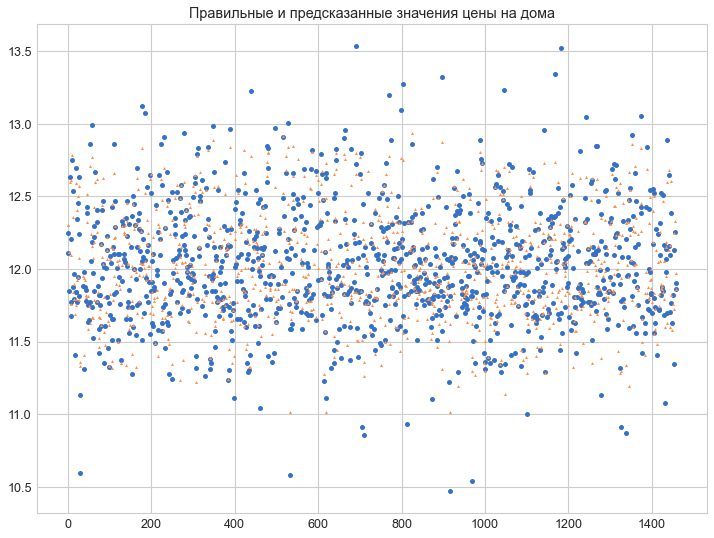

In [111]:
plt.plot(y_test.index, y_test, 'o', markersize = 5)
plt.plot(y_test.index, y_pred, 'y^', markersize = 3)
plt.title('Правильные и предсказанные значения цены на дома')
plt.show()